<a href="https://colab.research.google.com/github/yuki-tamaribuchi/stats_code_kata/blob/master/wine_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/wine.txt"
urllib.request.urlretrieve(url, 'wine.txt') 

('wine.txt', <http.client.HTTPMessage at 0x7fd229f78400>)

In [3]:
df=pd.read_csv('wine.txt',sep='\t',index_col=0)

In [4]:
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd229a69ac8>,
      dtype=object)

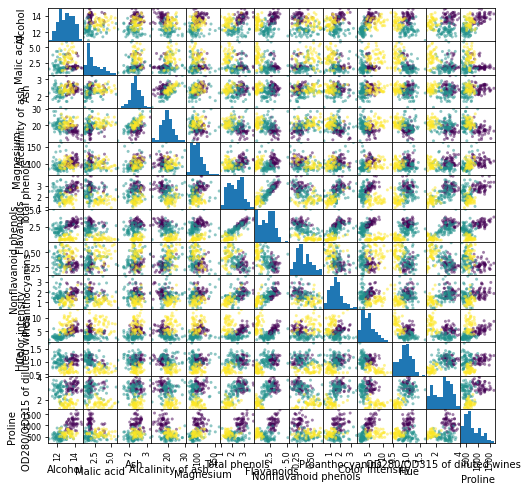

In [5]:
pd.plotting.scatter_matrix(df.iloc[:,1:],figsize=(8,8),c=list(df.iloc[:,0]),alpha=0.5)

In [6]:
import seaborn as sns

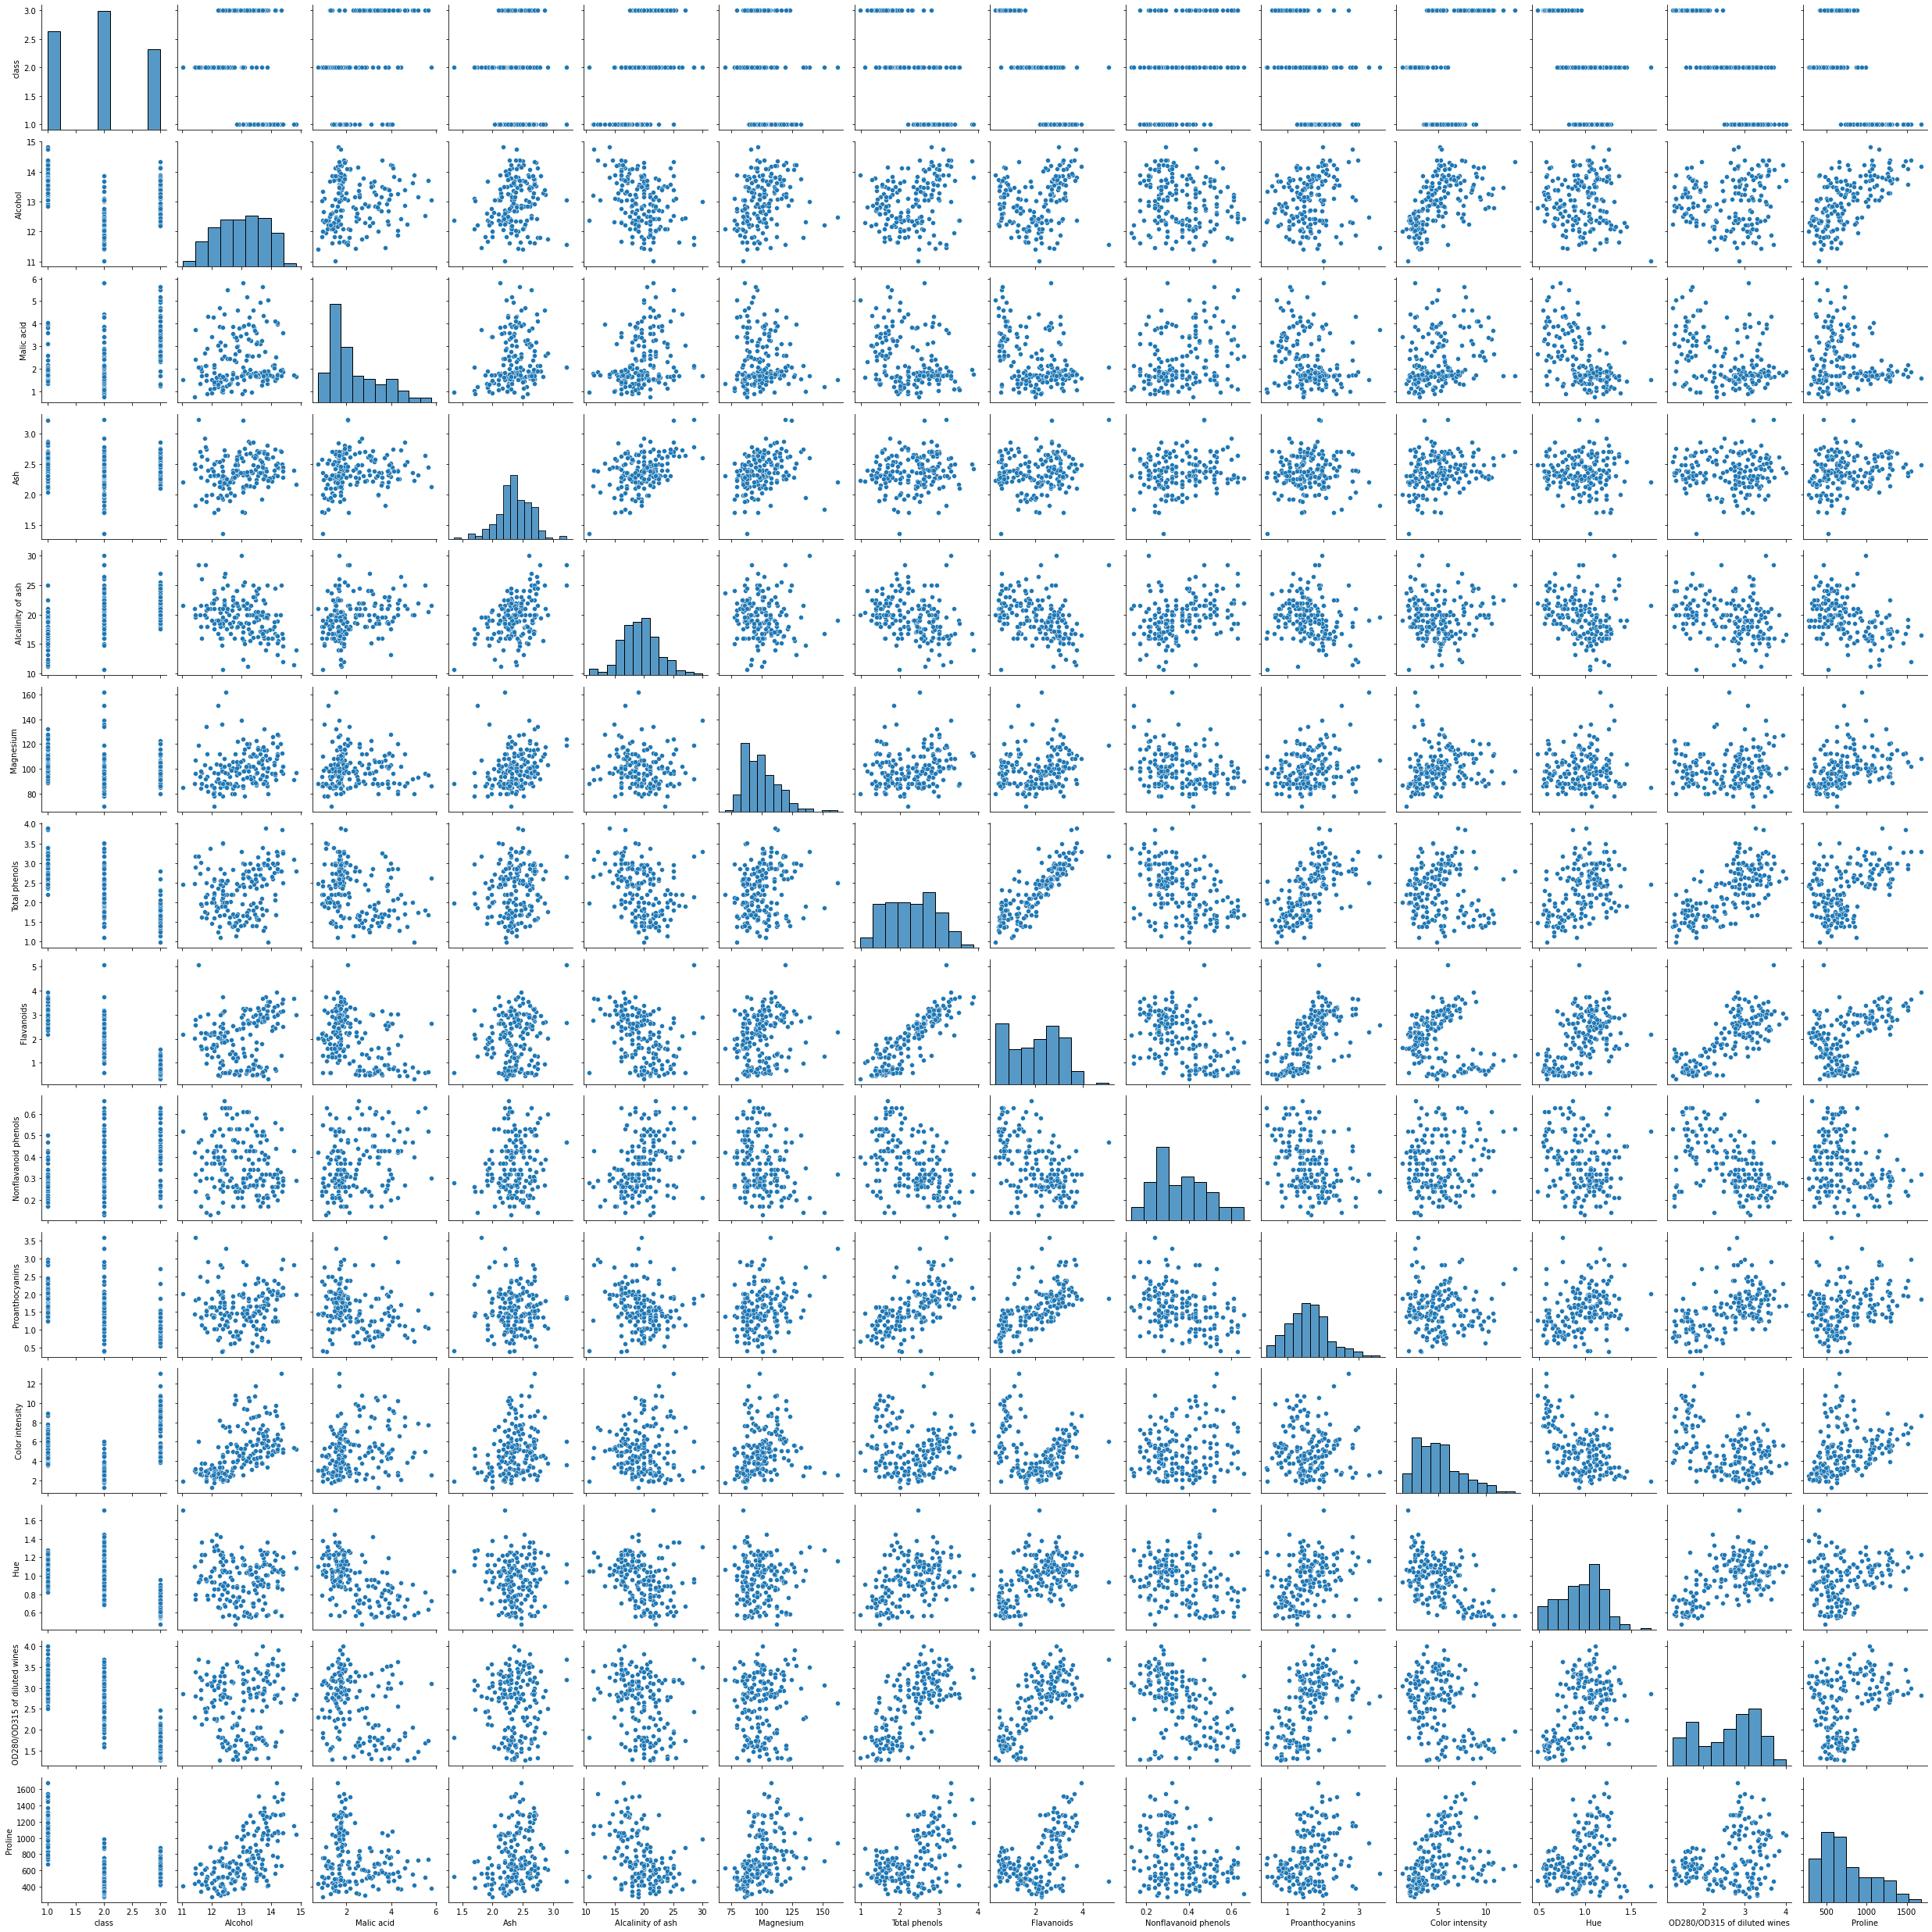

In [7]:
sns.pairplot(df)

In [8]:
dfs=df.iloc[:,1:].apply(lambda x: (x-x.mean())/x.std(),axis=0)

In [9]:
dfs.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767


In [10]:
from sklearn.decomposition import PCA

In [11]:
pca=PCA()
pca.fit(dfs)
feature=pca.transform(dfs)

In [12]:
pd.DataFrame(feature,columns=["PC{}".format(x+1) for x in range(len(dfs.columns))]).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.307421,-1.439402,-0.165273,-0.215025,0.691093,-0.223250,0.594749,0.064956,0.639638,1.018084,-0.450293,0.539289,-0.066052
1,2.203250,0.332455,-2.020757,-0.290539,-0.256930,-0.924512,0.053624,1.021534,-0.307978,0.159252,-0.142256,0.387146,0.003626
2,2.509661,-1.028251,0.980054,0.722863,-0.250327,0.547731,0.423012,-0.343248,-1.174521,0.113042,-0.285866,0.000582,0.021655
3,3.746497,-2.748618,-0.175696,0.566386,-0.310964,0.114109,-0.382259,0.641783,0.052397,0.238739,0.757448,-0.241339,-0.368444
4,1.006070,-0.867384,2.020987,-0.408613,0.297618,-0.405376,0.442825,0.415528,0.325900,-0.078146,-0.524466,-0.216055,-0.079140


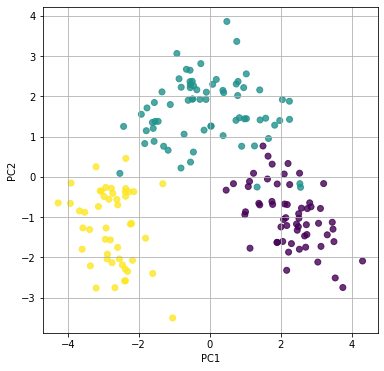

In [13]:
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(df.iloc[:, 0]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

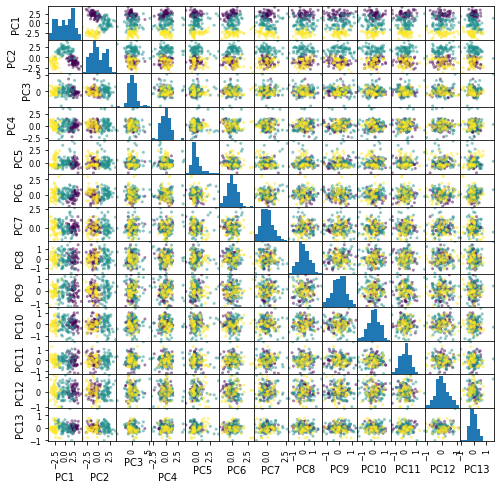

In [14]:
from pandas import plotting 
plotting.scatter_matrix(pd.DataFrame(feature, 
                        columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]), 
                        figsize=(8, 8), c=list(df.iloc[:, 0]), alpha=0.5) 
plt.show()

In [15]:
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,0.361988
PC2,0.192075
PC3,0.111236
PC4,0.070690
PC5,0.065633
PC6,0.049358
PC7,0.042387
PC8,0.026807
PC9,0.022222
PC10,0.019300


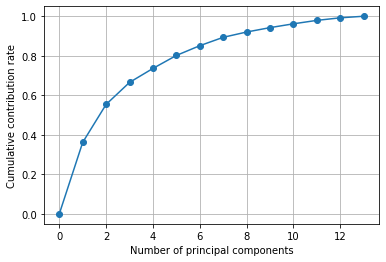

In [16]:
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

In [17]:
pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,4.705850
PC2,2.496974
PC3,1.446072
PC4,0.918974
PC5,0.853228
PC6,0.641657
PC7,0.551028
PC8,0.348497
PC9,0.288880
PC10,0.250902


In [18]:
pd.DataFrame(pca.components_, columns=df.columns[1:], index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
PC1,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
PC2,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903
PC3,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746
PC4,-0.017856,0.536890,-0.214176,0.060859,-0.351797,0.198068,0.152295,-0.203301,0.399057,0.065926,-0.427771,0.184121,-0.232071
PC5,-0.265664,0.035214,-0.143025,0.066103,0.727049,-0.149318,-0.109026,-0.500703,0.136860,-0.076437,-0.173615,-0.101161,-0.157869
PC6,-0.213539,-0.536814,-0.154475,0.100825,-0.038144,0.084122,0.018920,0.258594,0.533795,0.418644,-0.105983,-0.265851,-0.119726
PC7,-0.056396,0.420524,-0.149171,-0.286969,0.322883,-0.027925,-0.060685,0.595447,0.372139,-0.227712,0.232076,-0.044764,0.076805
PC8,-0.396139,-0.065827,0.170260,-0.427970,0.156361,0.405934,0.187245,0.233285,-0.368227,0.033797,-0.436624,0.078108,-0.120023
PC9,0.508619,-0.075283,-0.307694,0.200449,0.271403,0.286035,0.049578,0.195501,-0.209145,0.056218,0.085828,0.137227,-0.575786
PC10,0.211605,-0.309080,-0.027125,0.052799,0.067870,-0.320131,-0.163151,0.215535,0.134184,-0.290775,-0.522399,0.523706,0.162116


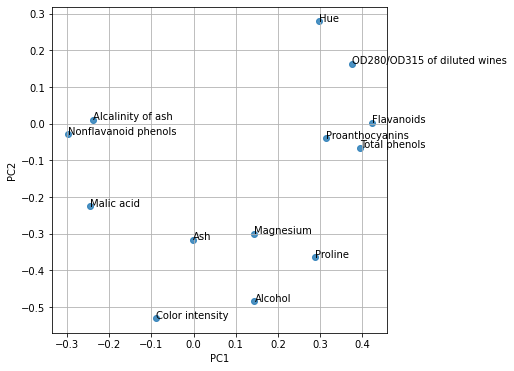

In [19]:
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], df.columns[1:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [20]:
dfs=dfs[['Color intensity','Flavanoids','Alcohol','Proline']]

In [21]:
pca=PCA()
feature=pca.fit_transform(dfs)

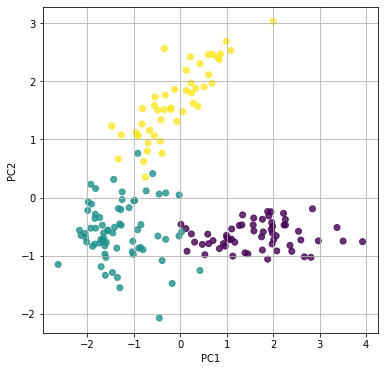

In [22]:
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(df.iloc[:, 0]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

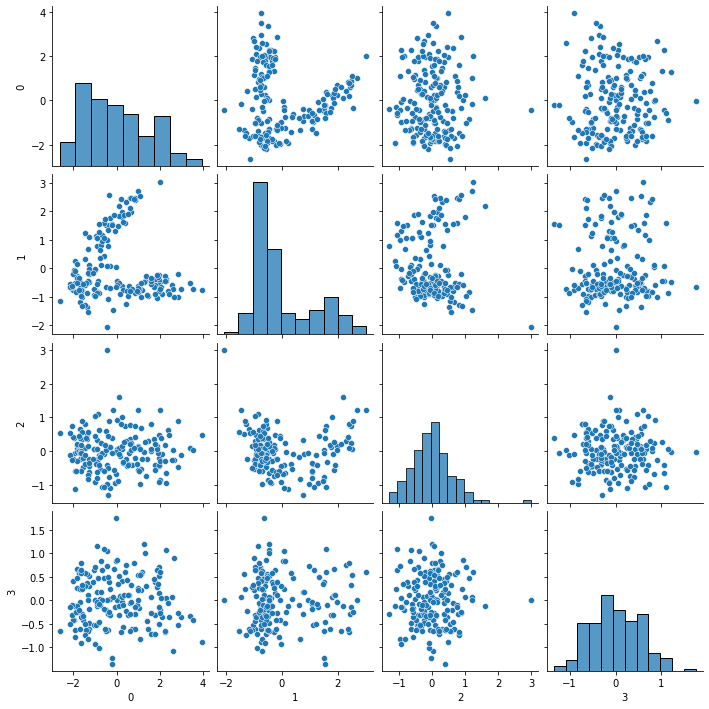

In [23]:
sns.pairplot(pd.DataFrame(feature))

In [24]:
pd.DataFrame(pca.explained_variance_,index=['PC{}'.format(x+1) for x in range(len(dfs.columns))])

,0
PC1,2.134122
PC2,1.238082
PC3,0.339148
PC4,0.288648


In [25]:
pd.DataFrame(pca.components_,columns=dfs.columns,index=['PC{}'.format(x+1) for x in range(len(dfs.columns))])

,Color intensity,Flavanoids,Alcohol,Proline
PC1,0.409416,0.325547,0.605601,0.599704
PC2,0.633932,-0.725357,0.168286,-0.208967
PC3,0.636547,0.566896,-0.388715,-0.349768
PC4,-0.159113,0.215651,0.673667,-0.688731
